In [2]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
import json
import datetime

In [3]:
data = pd.read_csv('diagnose_merged.csv')
print(data)

        Unnamed: 0  SUBJECT_ID  HADM_ID  SEQ_NUM ICD9_CODE  \
0                0           2   163353      1.0     V3001   
1                1           2   163353      2.0      V053   
2                2           2   163353      3.0      V290   
3                3           3   145834      9.0      2639   
4                4           3   145834      7.0      6826   
5                5           3   145834      6.0      4280   
6                6           3   145834      5.0     41071   
7                7           3   145834      8.0      4254   
8                8           3   145834      3.0      5849   
9                9           3   145834      2.0     78559   
10              10           3   145834      1.0      0389   
11              11           3   145834      4.0      4275   
12              12           4   185777      9.0     E9317   
13              13           4   185777      1.0       042   
14              14           4   185777      2.0      1363   
15      

In [25]:
data.describe()

,Unnamed: 0,SUBJECT_ID,HADM_ID,SEQ_NUM
count,651047.000000,651047.000000,651047.000000,651000.000000
mean,325523.000000,38971.159758,150017.744819,7.913836
std,187941.224689,29372.198841,28878.068648,6.072633
min,0.000000,2.000000,100001.000000,1.000000
25%,162761.500000,14562.500000,125028.000000,3.000000
50%,325523.000000,28671.000000,150140.000000,6.000000
75%,488284.500000,63715.000000,174978.000000,11.000000
max,651046.000000,99999.000000,199999.000000,39.000000


In [ ]:
#pie chart for all diagnosis

#labels = countdata['ICD9_CODE']
labels = countdata['SHORT_TITLE']

#check label number = size number
#sizes = countdata.loc[countdata['Count']>=3000]
sizes = countdata['Count']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [4]:
#each diagnosis(ICD9 code) how many patients
#assumed same person not diagnosed  with same disease multiple times = but yes
#count = number of times a disease is diagnosed
#print out ,'SHORT_TITLE'
countdata= data.groupby(['ICD9_CODE', 'SHORT_TITLE'], sort=False).size().reset_index(name='Count')


#countdata2= [data.groupby(['ICD9_CODE'], sort=False).size().reset_index(name='Count')

print(countdata)

     ICD9_CODE               SHORT_TITLE  Count
0        V3001    Single lb in-hosp w cs   2758
1         V053  Need prphyl vc vrl hepat   5779
2         V290    NB obsrv suspct infect   5519
3         2639   Protein-cal malnutr NOS   1259
4         6826         Cellulitis of leg    732
5         4280                   CHF NOS  13111
6        41071  Subendo infarct, initial   3055
7         4254   Prim cardiomyopathy NEC   1709
8         5849  Acute kidney failure NOS   9119
9        78559      Shock w/o trauma NEC    535
10        0389            Septicemia NOS   3725
11        4275            Cardiac arrest   1361
12       E9317   Adv eff antiviral drugs     30
13         042    Human immuno virus dis    538
14        1363            Pneumocystosis     86
15        7994                  Cachexia    251
16        2763                 Alkalosis    984
17        7907                Bacteremia   1478
18        5715    Cirrhosis of liver NOS   1287
19       04111  Mth sus Stph aur els/NOS

In [5]:
#change col type
#countdata['Count']=pd.to_numeric(countdata['Count'])
countdata['Count'] = countdata['Count'].astype(int)

types = countdata.dtypes
print(types)  

ICD9_CODE      object
SHORT_TITLE    object
Count           int64
dtype: object


In [6]:

piedata = countdata.loc[countdata['Count']>=5000]
#check label number = size number
print(piedata)

    ICD9_CODE               SHORT_TITLE  Count
1        V053  Need prphyl vc vrl hepat   5779
2        V290    NB obsrv suspct infect   5519
5        4280                   CHF NOS  13111
8        5849  Acute kidney failure NOS   9119
25       2859                Anemia NOS   5406
33       4019          Hypertension NOS  20703
45       2720   Pure hypercholesterolem   5930
47      41401  Crnry athrscl natve vssl  12429
48      25000  DMII wo cmp nt st uncntr   9058
51       2724    Hyperlipidemia NEC/NOS   8690
77       5990  Urin tract infection NOS   6555
86      42731       Atrial fibrillation  12891
115     53081         Esophageal reflux   6326
335     51881  Acute respiratry failure   7497


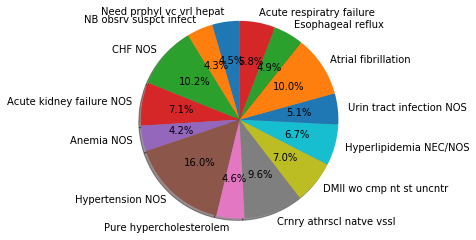

In [8]:
labels = piedata['SHORT_TITLE']
#check label number = size number
#sizes = countdata.loc[countdata['Count']>=3000]
sizes = piedata['Count']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

#label disease, hypertension, atrial fibrillation (heart conditions), congestive heartfailure

In [9]:
#statistics of diagnaosis number of a disease
countdata.describe()

,Count
count,6841.000000
mean,92.780149
std,539.916435
min,1.000000
25%,2.000000
50%,6.000000
75%,28.000000
max,20703.000000


In [10]:
#cardiovascular disease 
findcardio=countdata[countdata['SHORT_TITLE'].str.contains('Cardio|cardio|heart|Heart|obstructive pulmonary', na=False)]
print(findcardio)

     ICD9_CODE               SHORT_TITLE  Count
7         4254   Prim cardiomyopathy NEC   1709
41        9971          Surg compl-heart   2343
57       78551         Cardiogenic shock   1154
125       4281        Left heart failure     23
182       V173   Fam hx-ischem heart dis    703
279      74689    Cong heart anomaly NEC     54
301      39891   Rheumatic heart failure    437
318       V433    Heart valve replac NEC    679
328      86113   Heart chamber lacer-opn      7
472       4168  Chr pulmon heart dis NEC   2148
529      99671   Comp-heart valve prosth     49
651       V422    Heart valve transplant    476
729      39890   Rheumatic heart dis NOS     63
951      E9421      Adv eff cardiotonics     44
1023      4255  Alcoholic cardiomyopathy     75
1058      4169  Chr pulmon heart dis NOS     80
1116     79439  Abn cardiovasc study NEC     20
1291      4299         Heart disease NOS    140
1450      5300   Achalasia & cardiospasm     42
1456     79431  Abnorm electrocardiogram

In [22]:
piedata2 = findcardio.loc[findcardio['Count']>=500]
#check label number = size number
print(piedata2)

    ICD9_CODE               SHORT_TITLE  Count
7        4254   Prim cardiomyopathy NEC   1709
41       9971          Surg compl-heart   2343
57      78551         Cardiogenic shock   1154
182      V173   Fam hx-ischem heart dis    703
318      V433    Heart valve replac NEC    679
472      4168  Chr pulmon heart dis NEC   2148


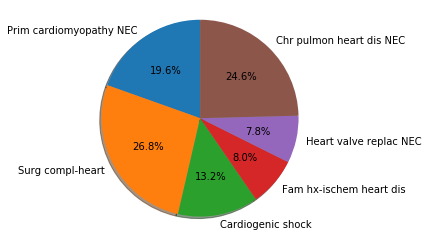

In [23]:
labels = piedata2['SHORT_TITLE']
#check label number = size number
#sizes = countdata.loc[countdata['Count']>=]
sizes = piedata2['Count']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

#barchart for percentage
#cluster(ontology with ICD9 code (every node/ICD9 50 individuals)medical ontology, snowmed, ulms), subsample(just hypertension), onehotencoding